In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_weather_train = pd.read_csv("weather_train.csv")
df_weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [4]:
def plot_gb(df : pd.DataFrame,group_by : str,x : str,y : str,fig_size : tuple[int,int] = (30,10)):
    ax = plt.figure(figsize=fig_size).gca()  # Create a single figure and axis

    for id, group in df.groupby(group_by):
        group.plot(x=x, y=y, ax=ax, label=f"{group_by} {id}")

    plt.title(f"{x} vs {y} for different {group_by}")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.legend()
    plt.show()

In [5]:
# for y in df_weather_train.columns.difference(['timestamp','site_id']):
#     plot_gb(df=df_weather_train,x="timestamp",y=y,group_by="site_id")

site_id
0     [Axes(0.125,0.11;0.775x0.77)]
1     [Axes(0.125,0.11;0.775x0.77)]
2     [Axes(0.125,0.11;0.775x0.77)]
3     [Axes(0.125,0.11;0.775x0.77)]
4     [Axes(0.125,0.11;0.775x0.77)]
5     [Axes(0.125,0.11;0.775x0.77)]
6     [Axes(0.125,0.11;0.775x0.77)]
7     [Axes(0.125,0.11;0.775x0.77)]
8     [Axes(0.125,0.11;0.775x0.77)]
9     [Axes(0.125,0.11;0.775x0.77)]
10    [Axes(0.125,0.11;0.775x0.77)]
11    [Axes(0.125,0.11;0.775x0.77)]
12    [Axes(0.125,0.11;0.775x0.77)]
13    [Axes(0.125,0.11;0.775x0.77)]
14    [Axes(0.125,0.11;0.775x0.77)]
15    [Axes(0.125,0.11;0.775x0.77)]
dtype: object

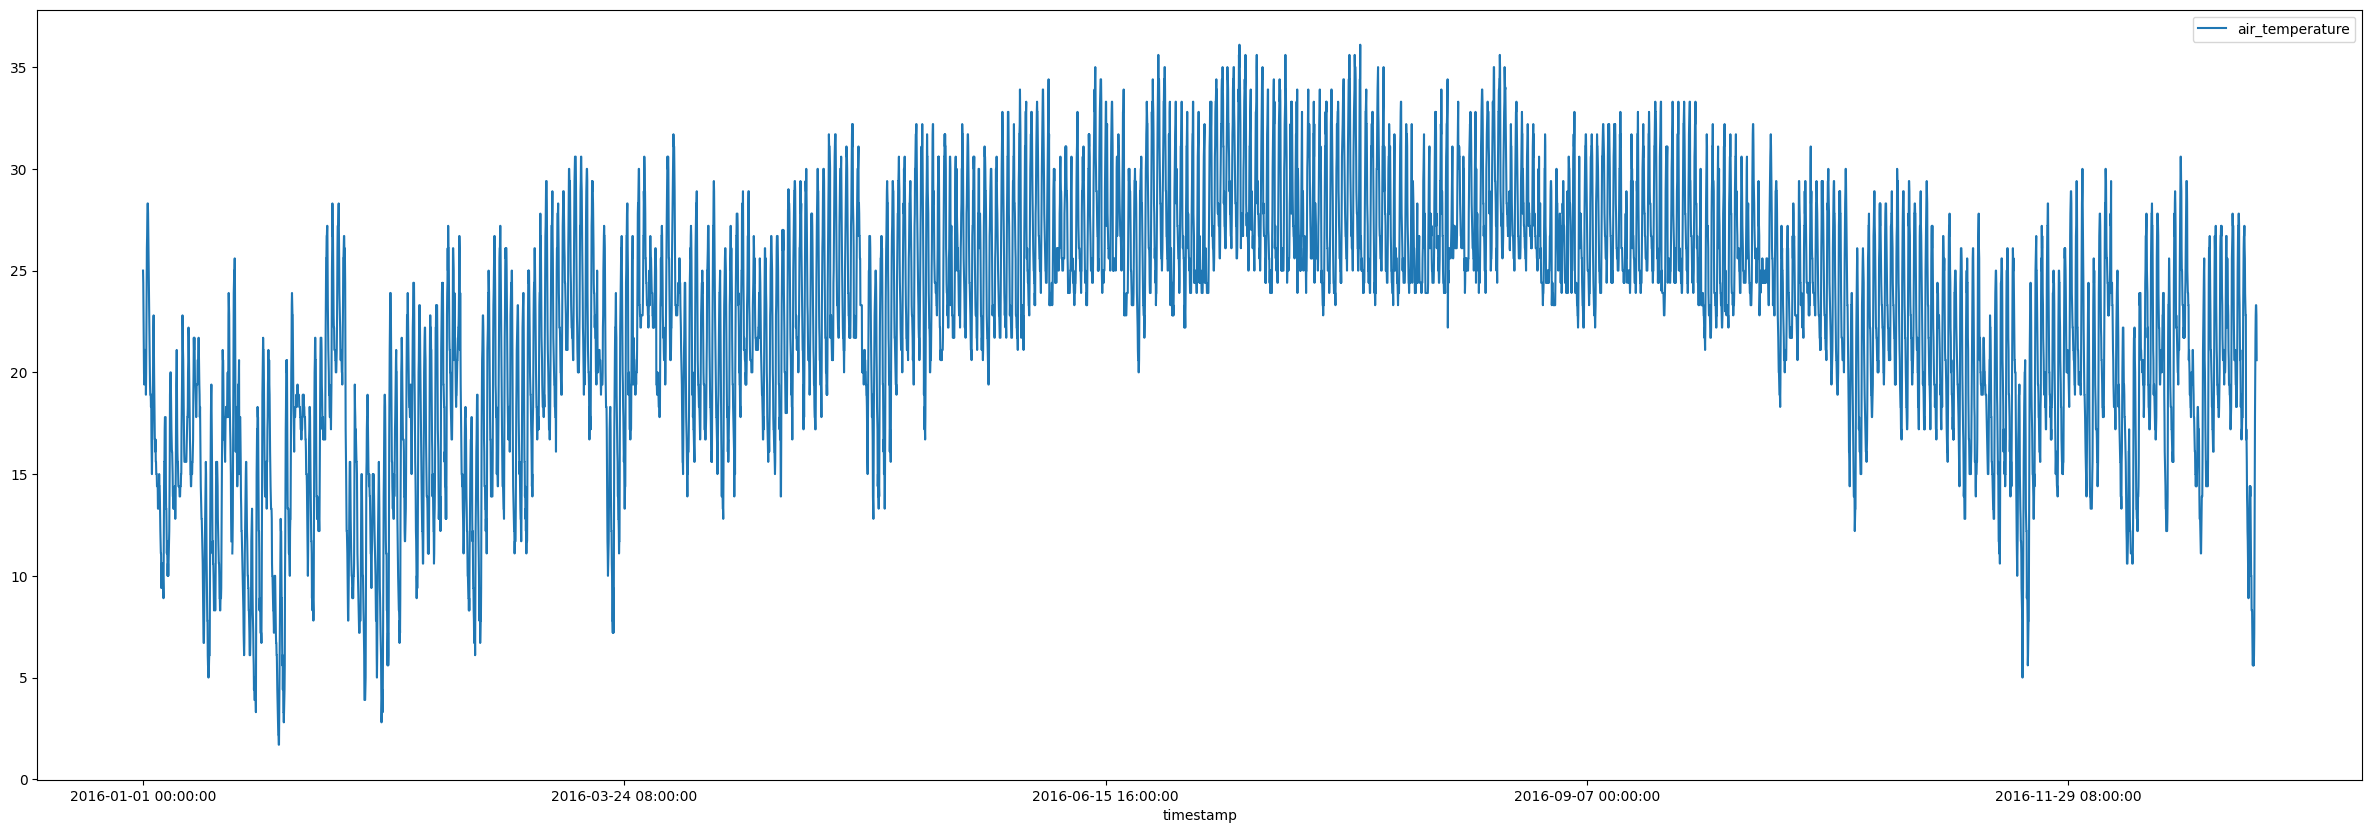

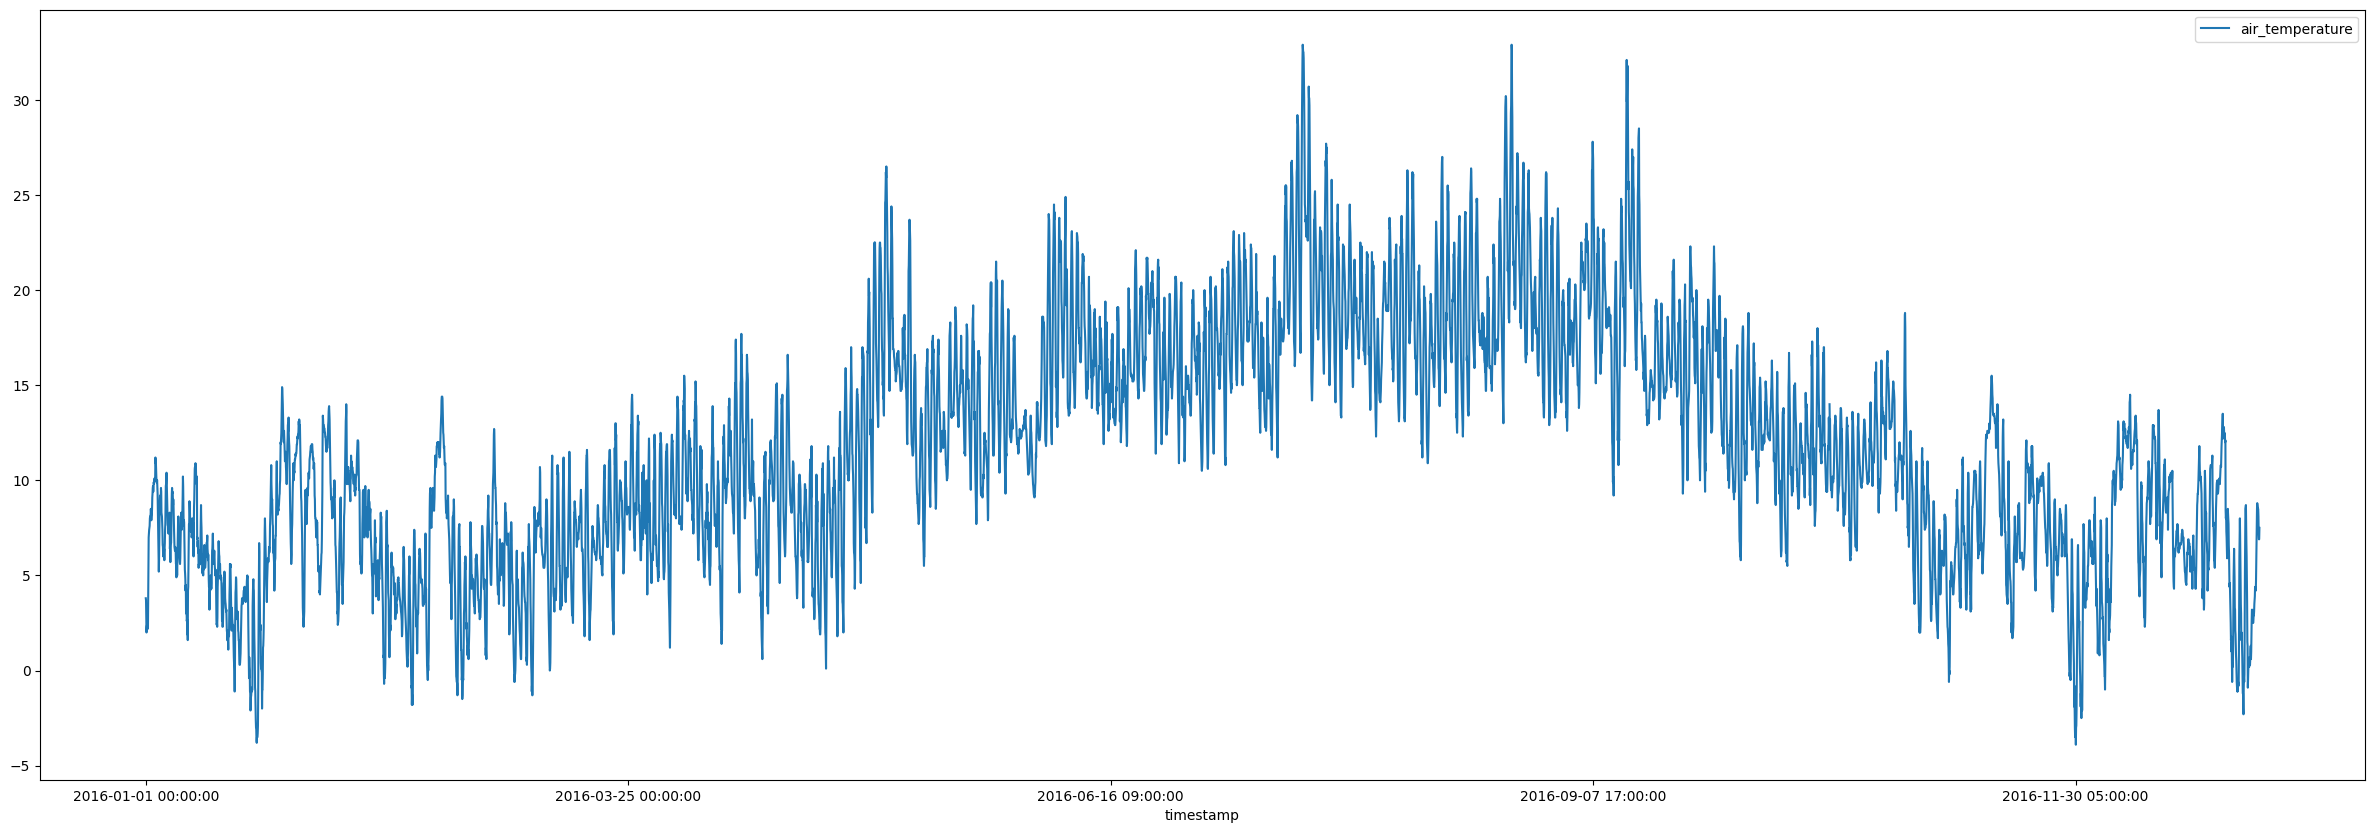

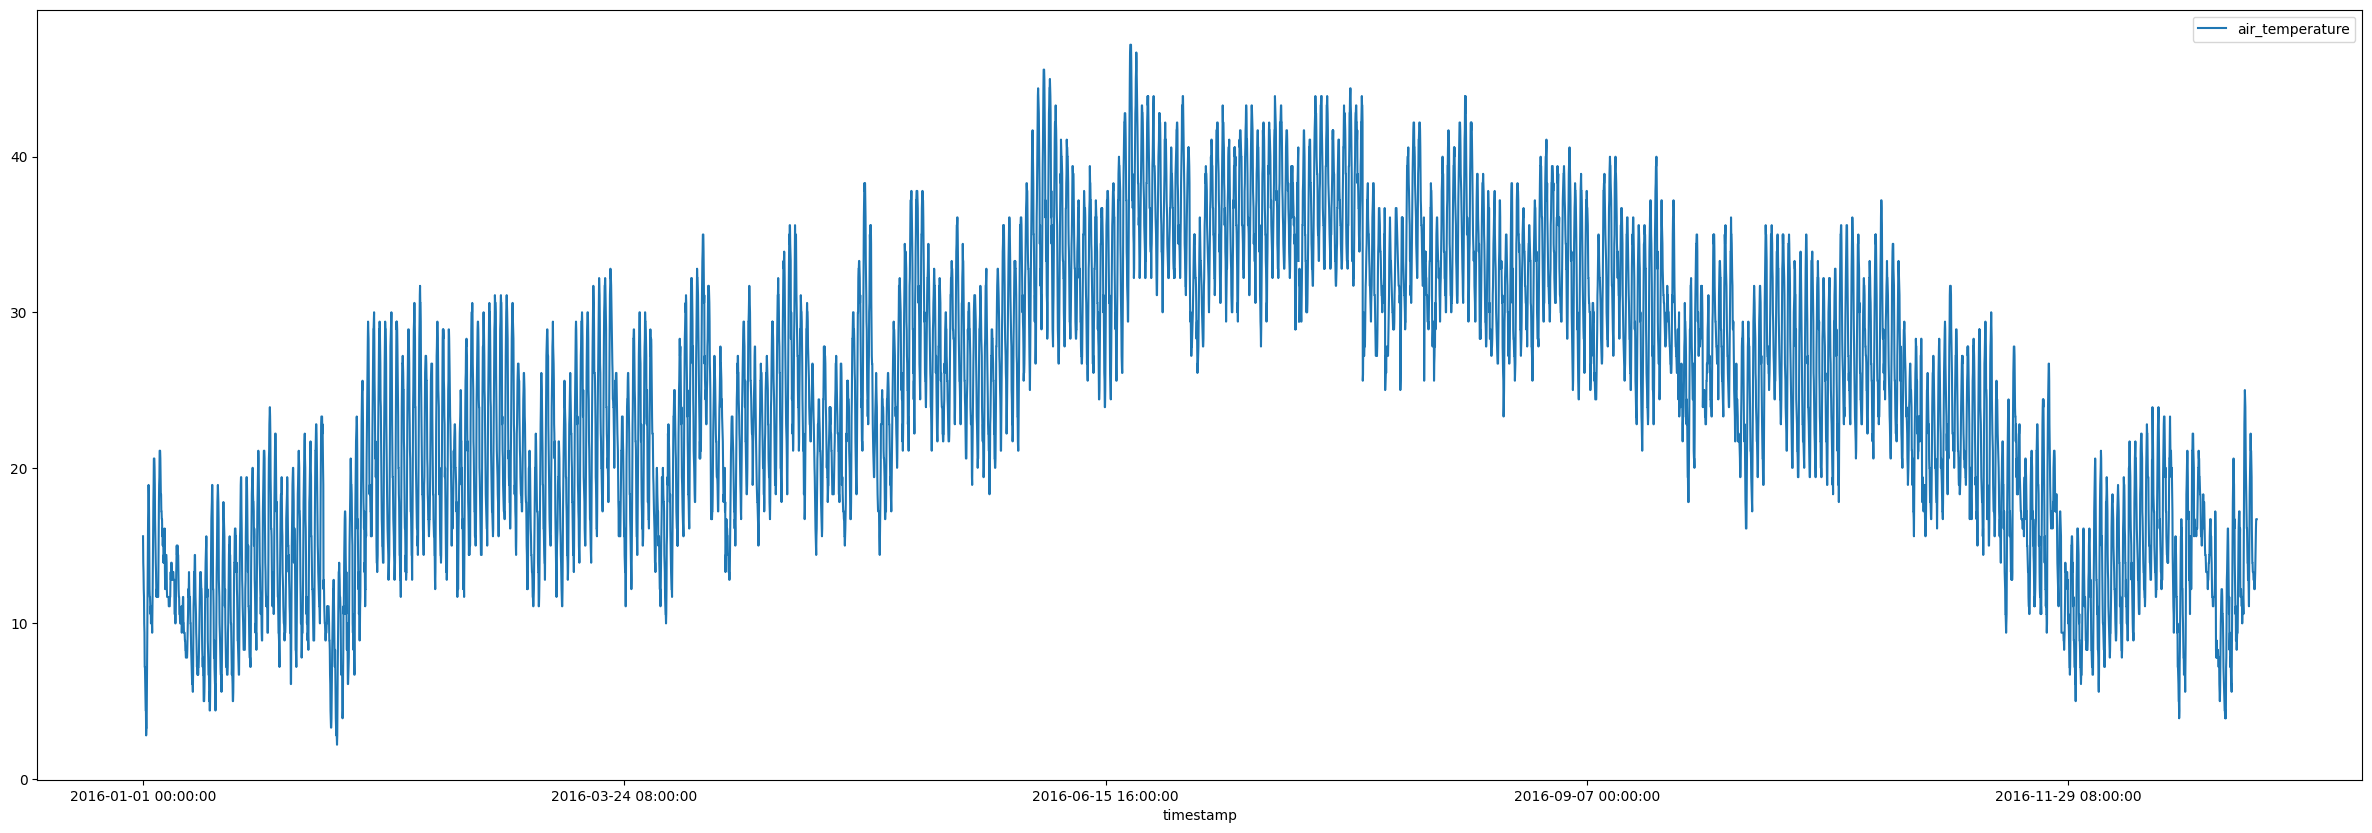

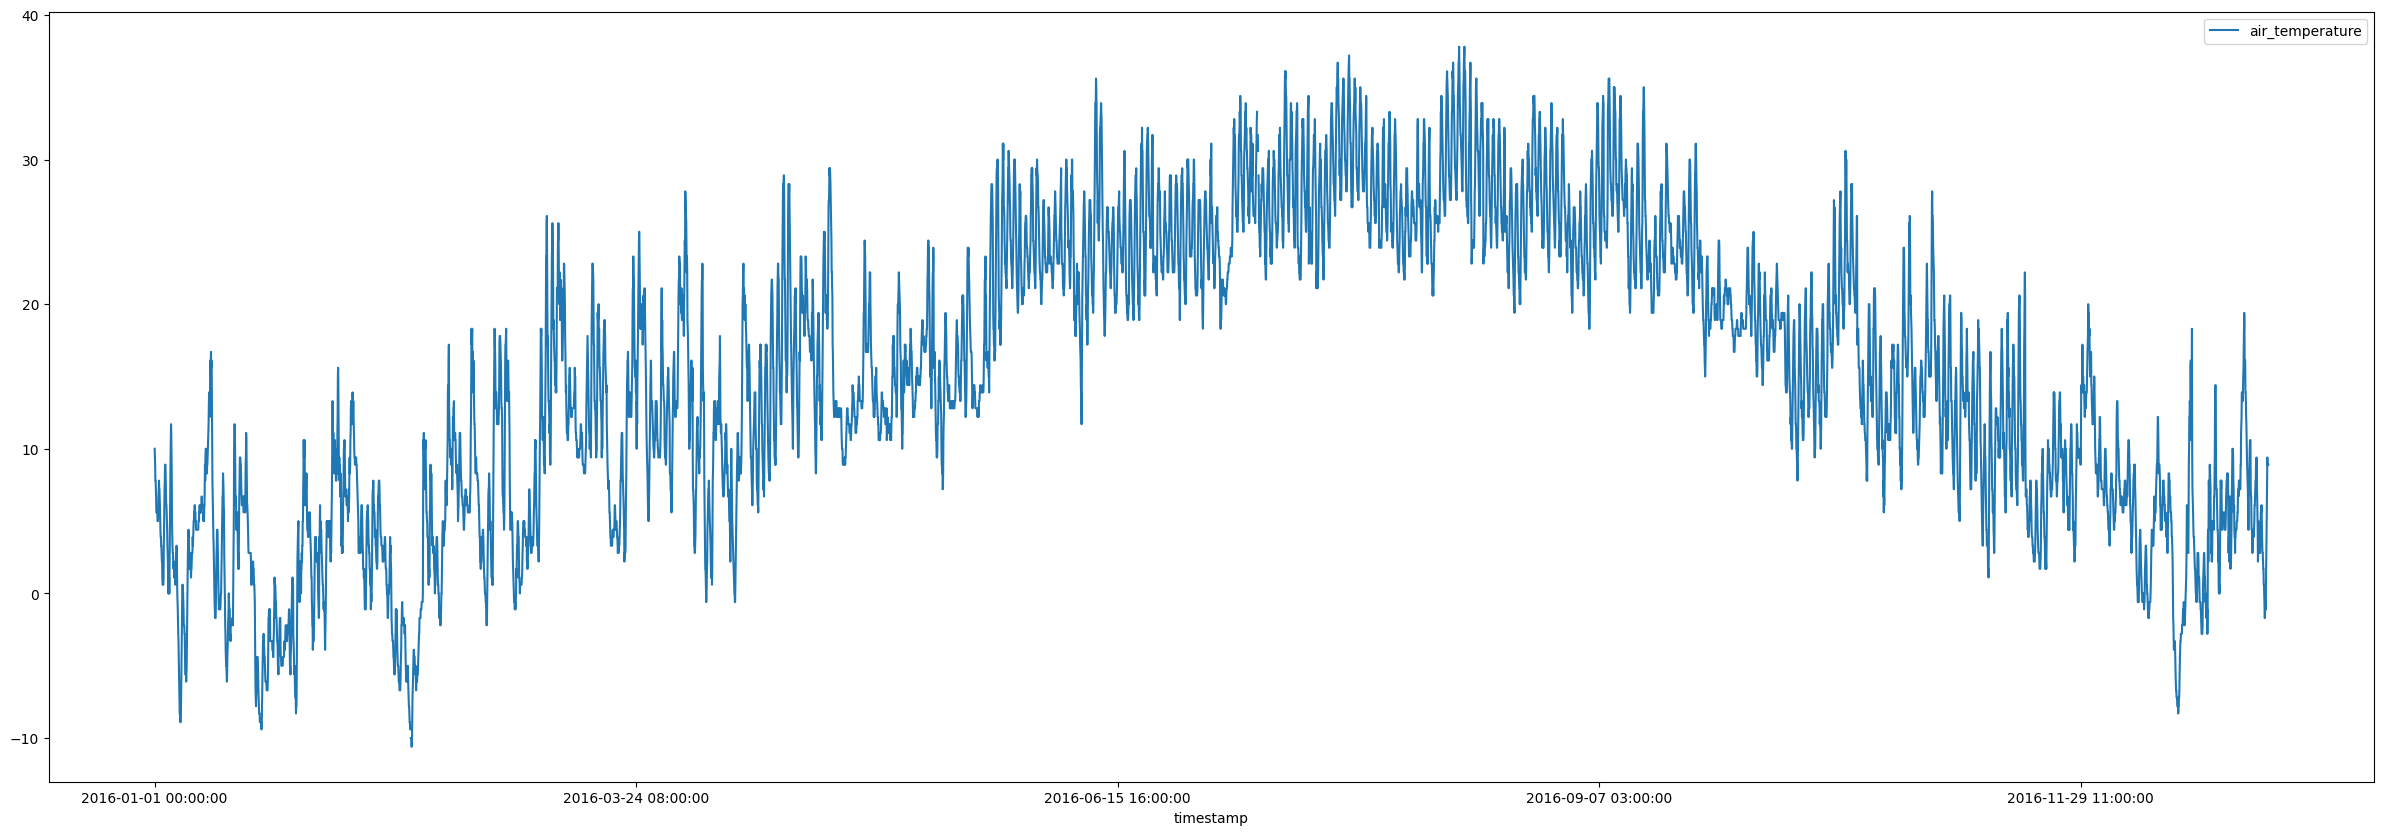

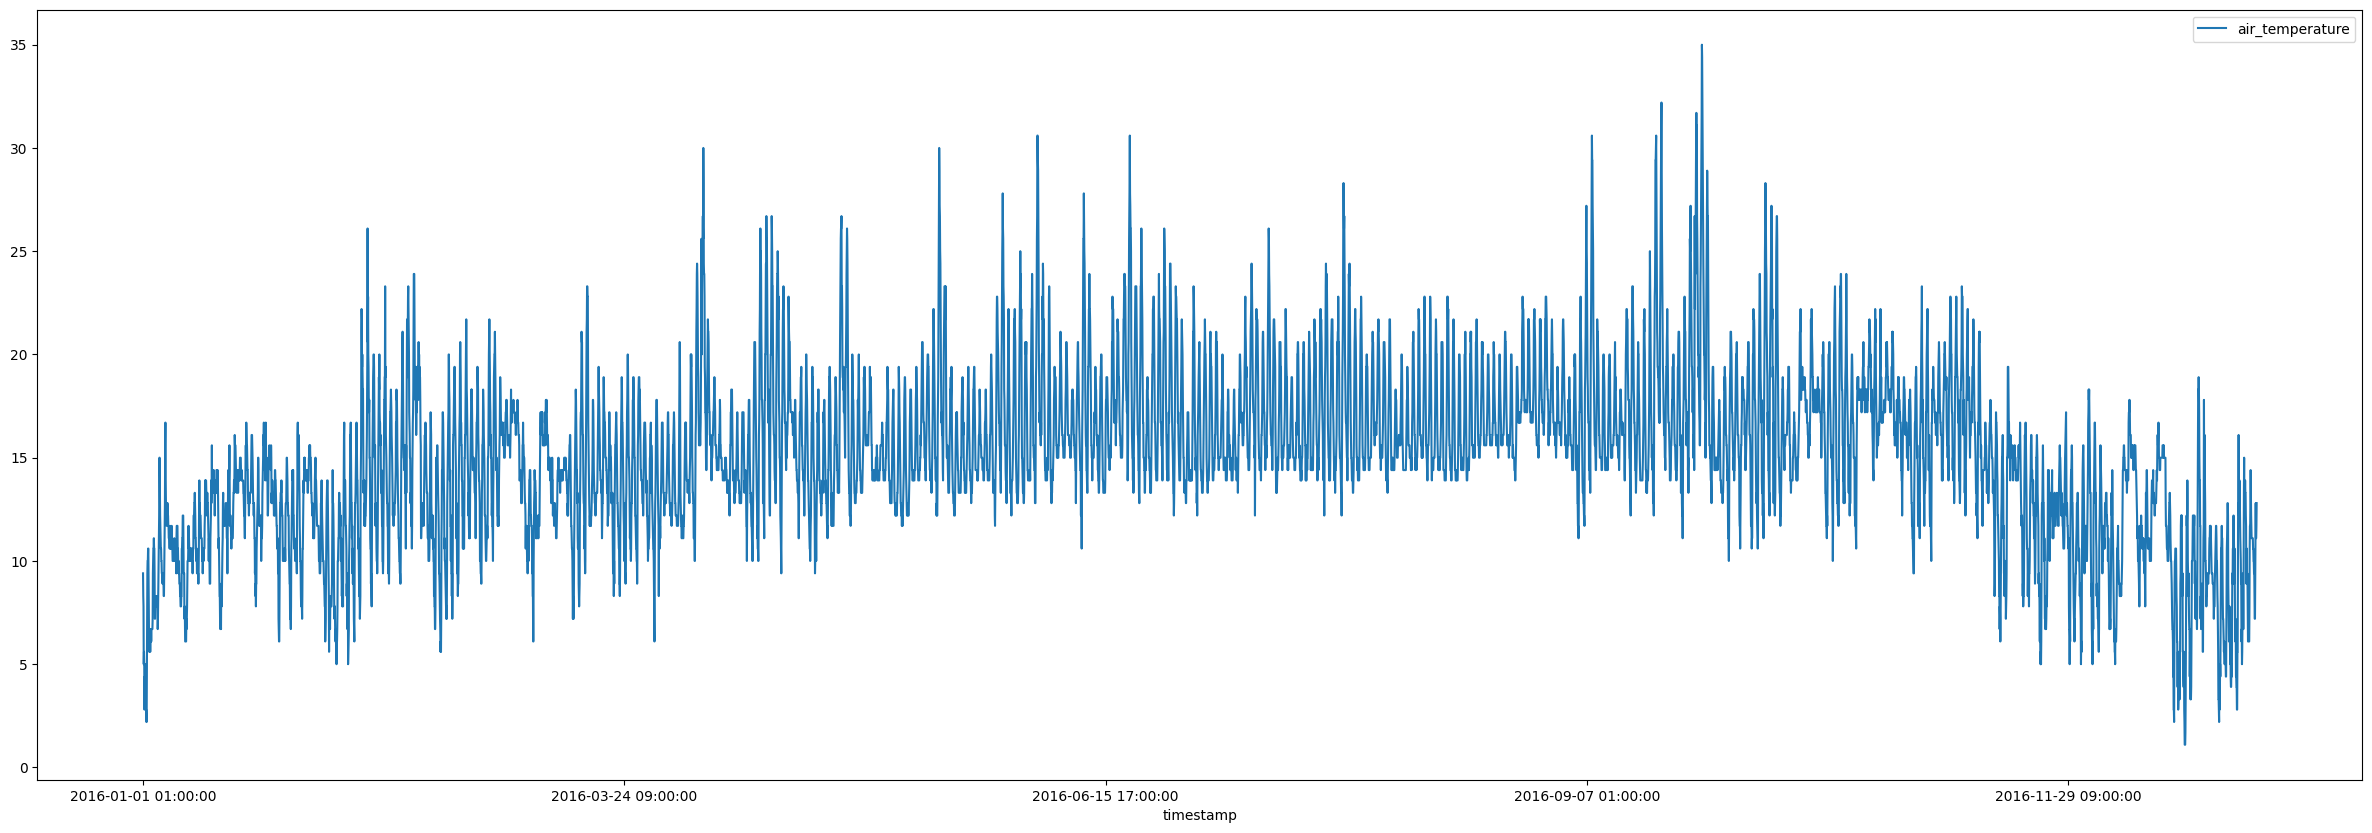

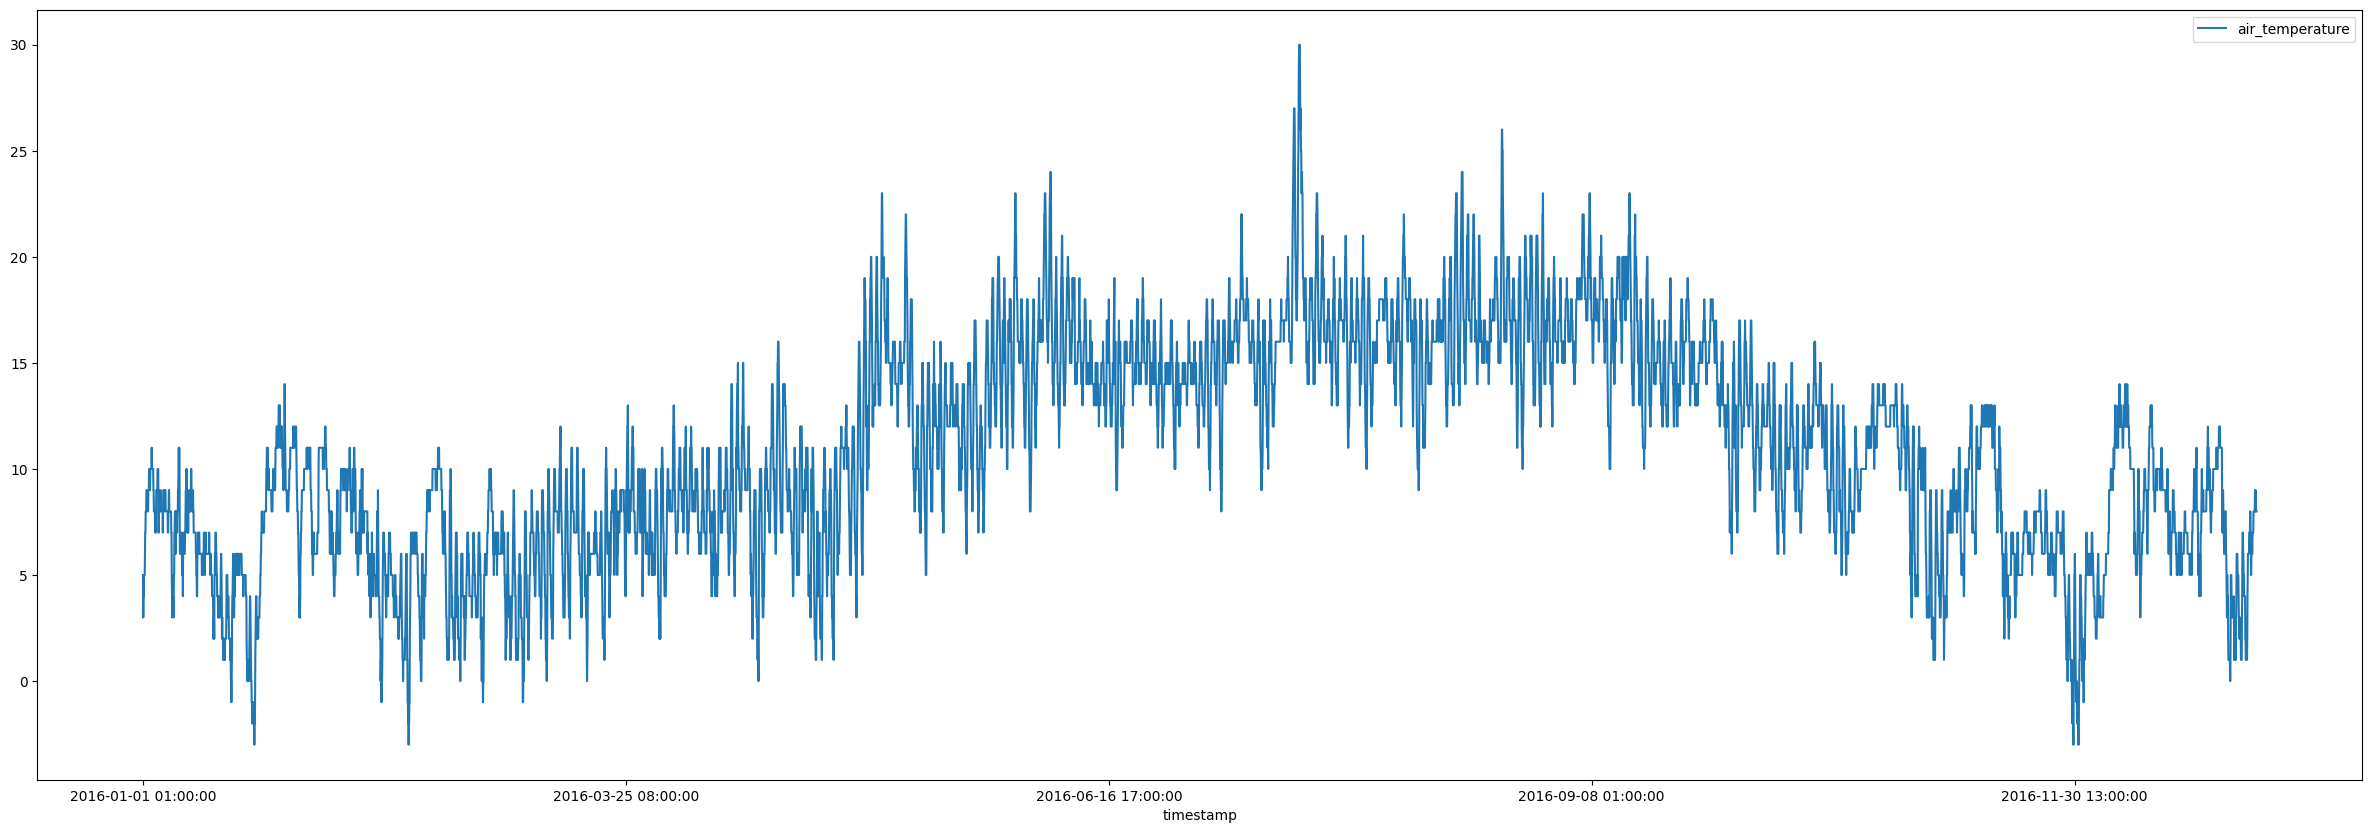

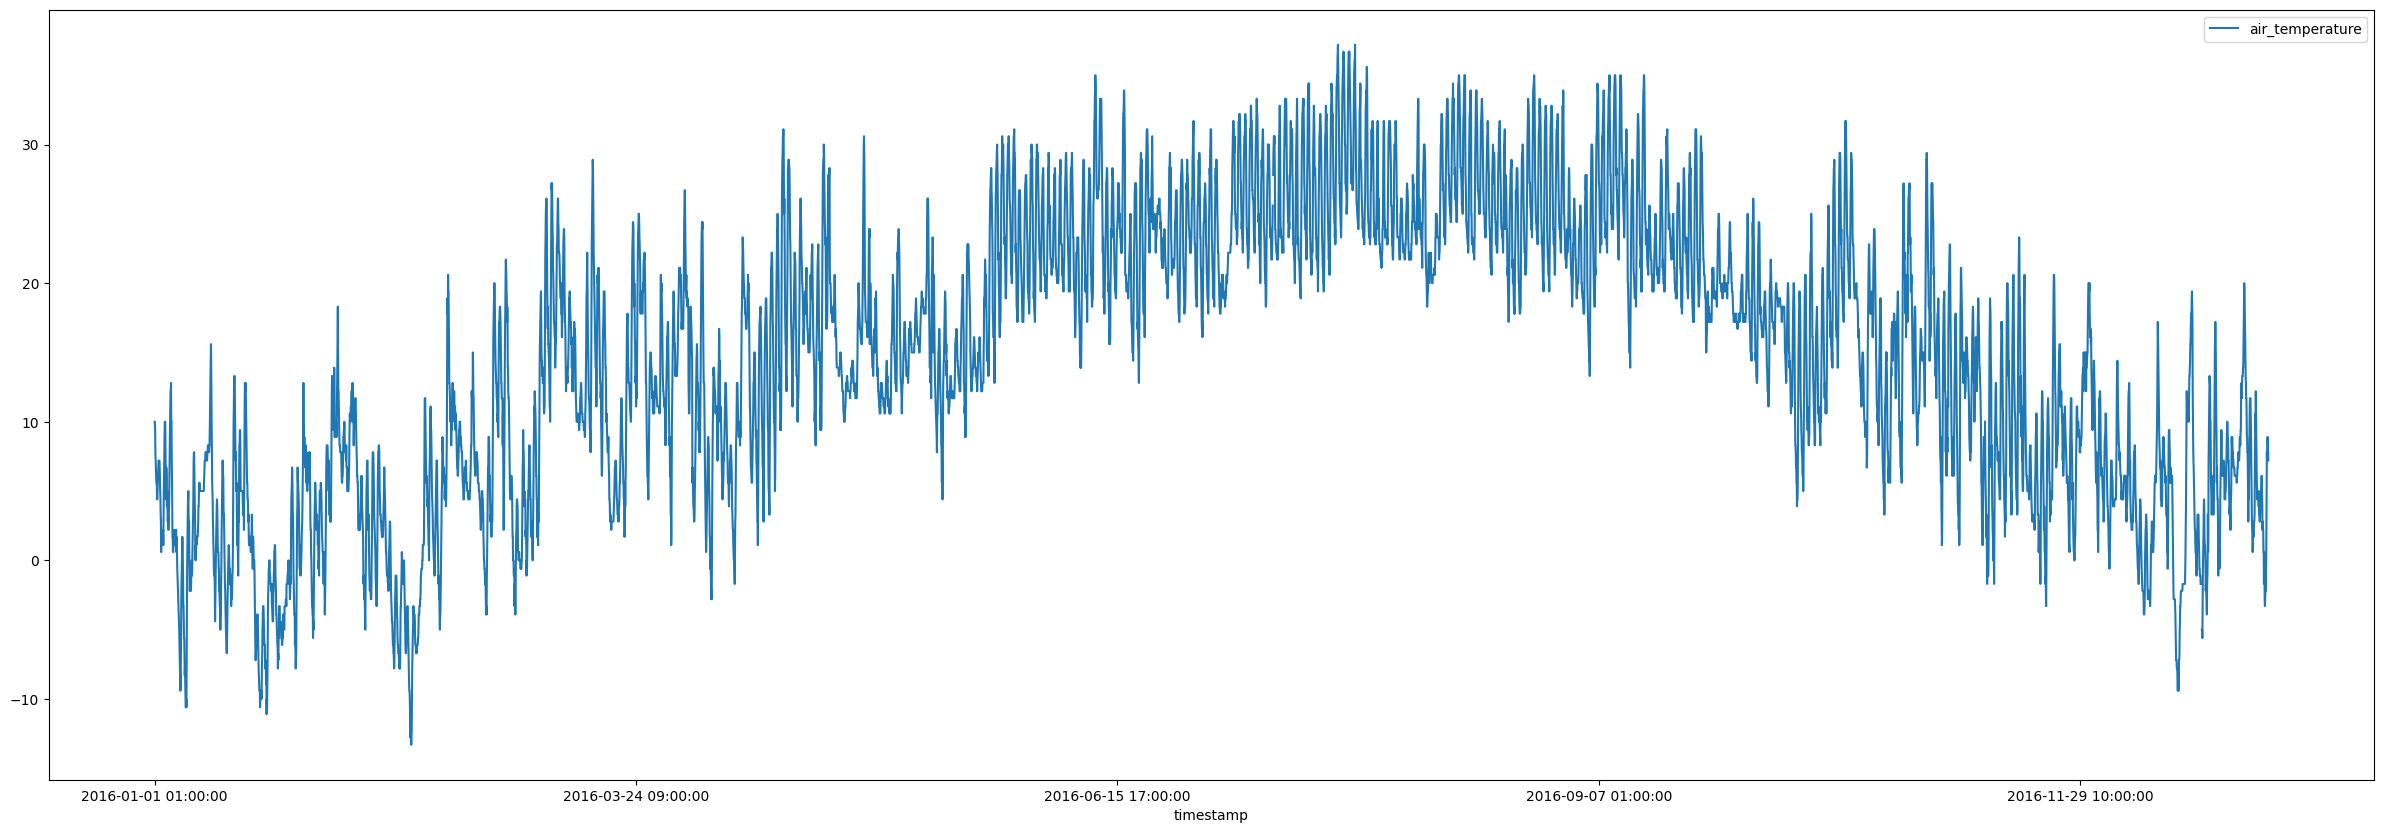

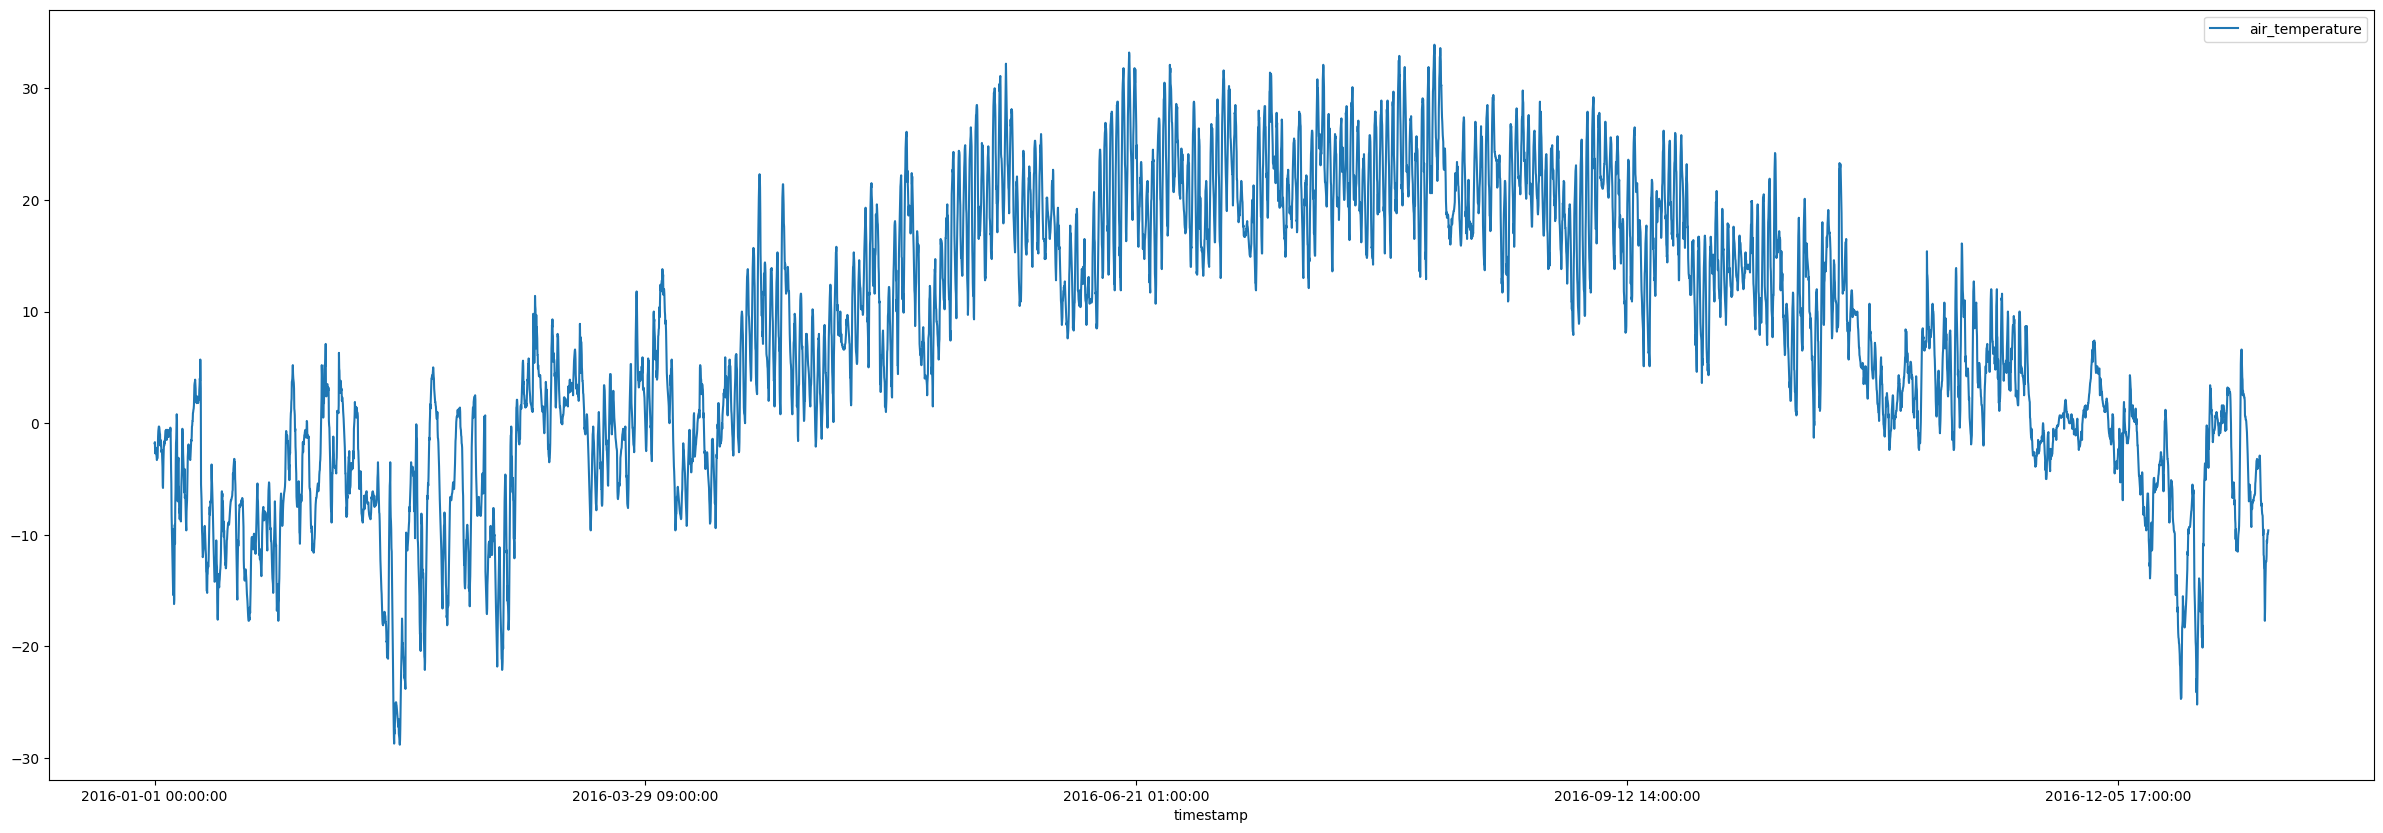

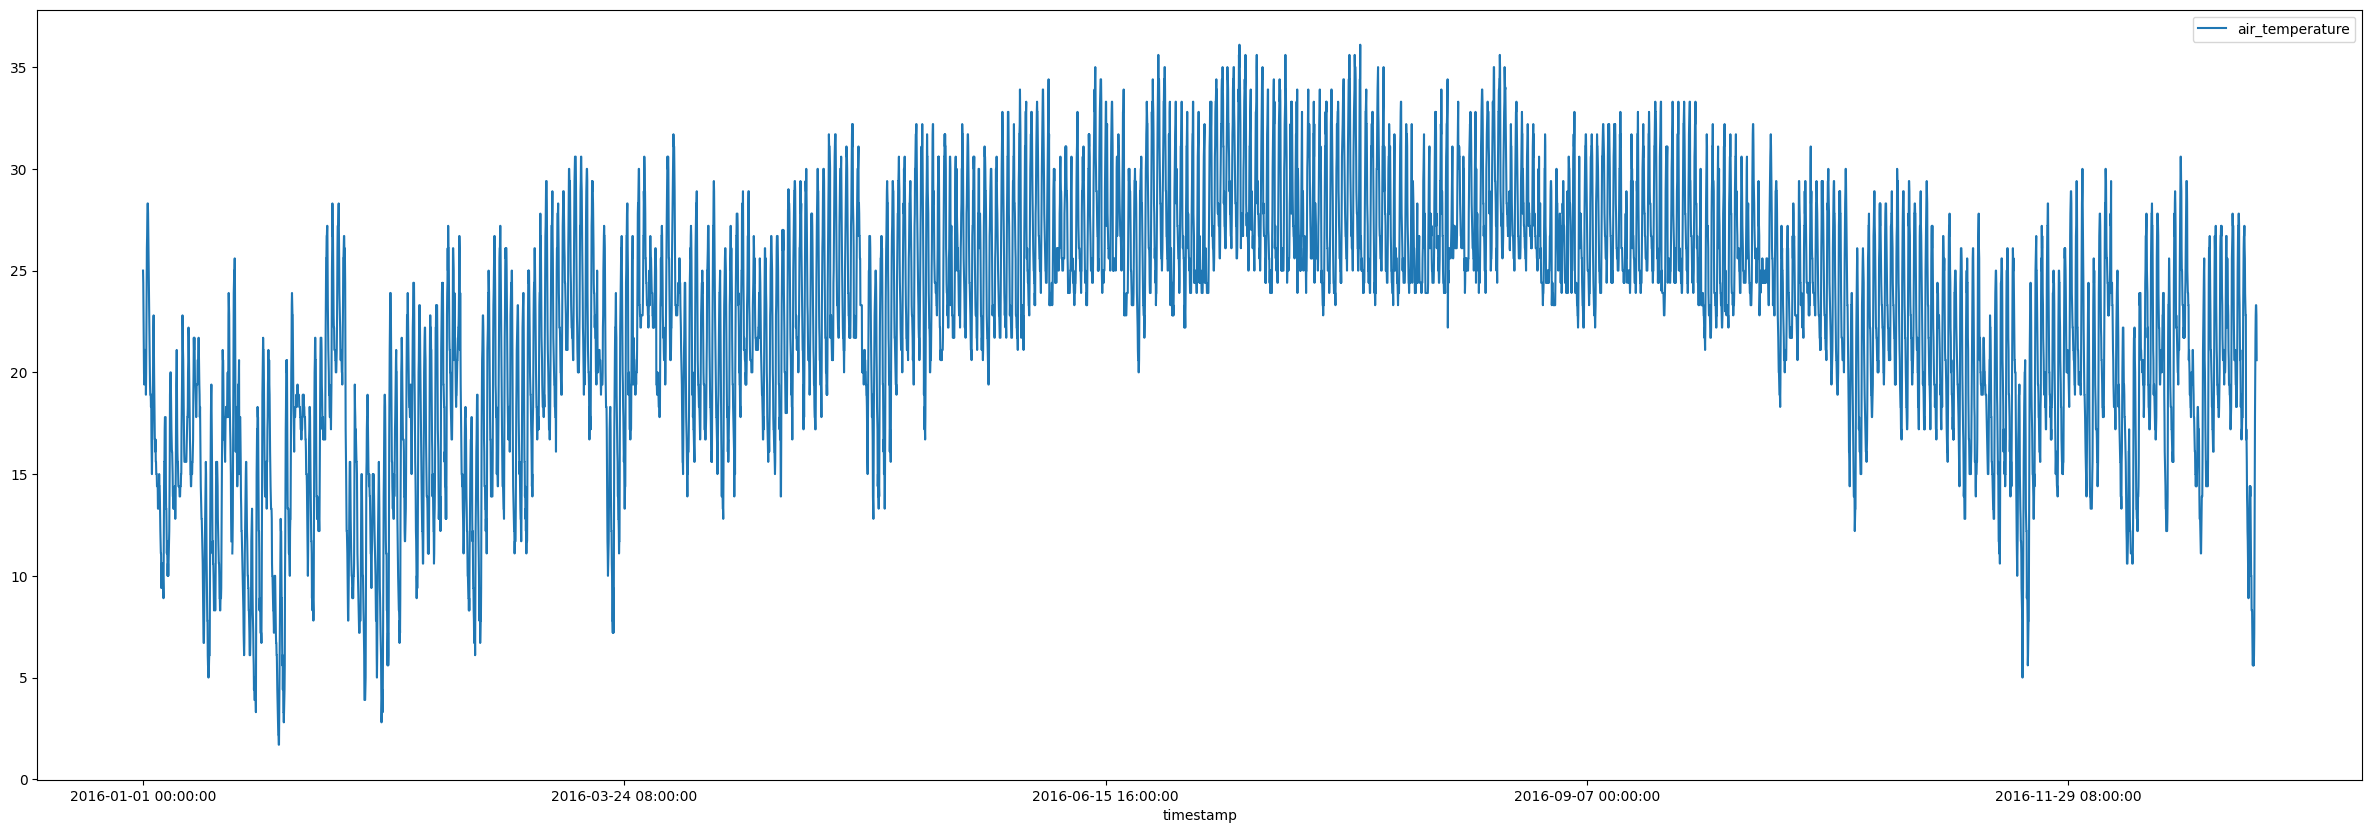

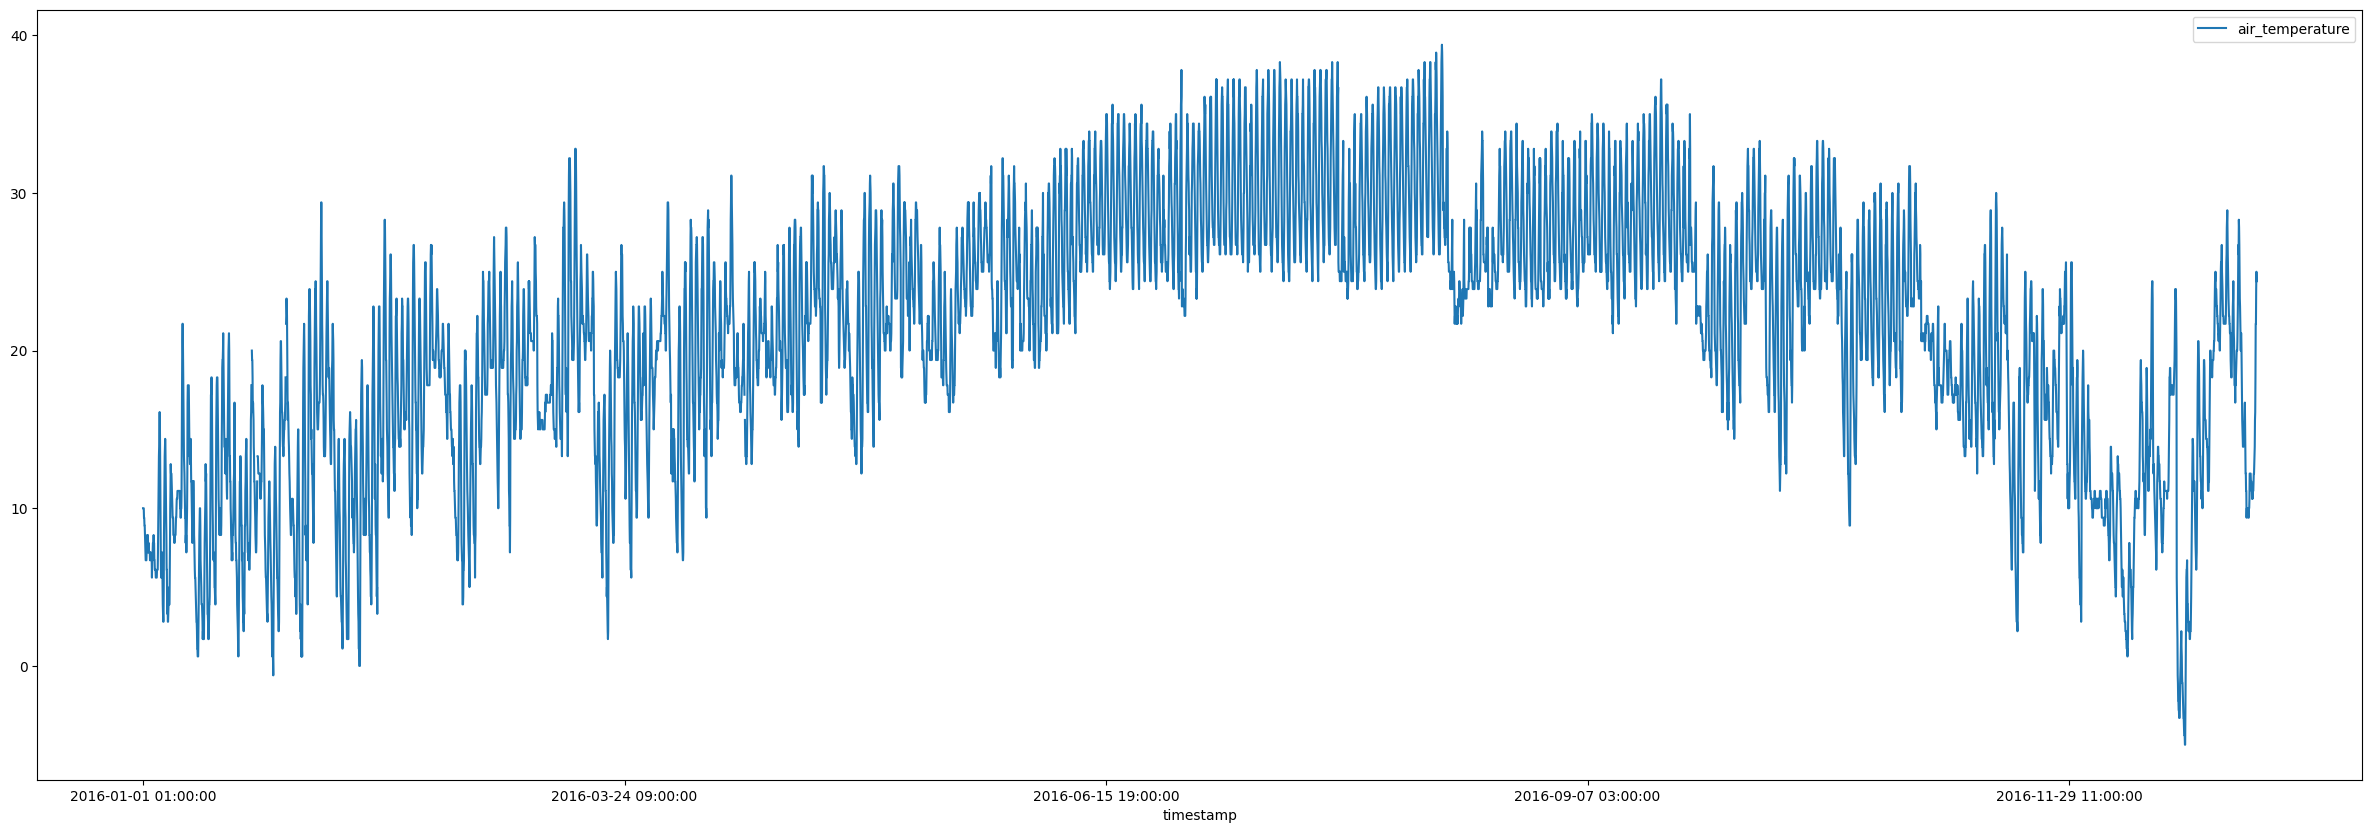

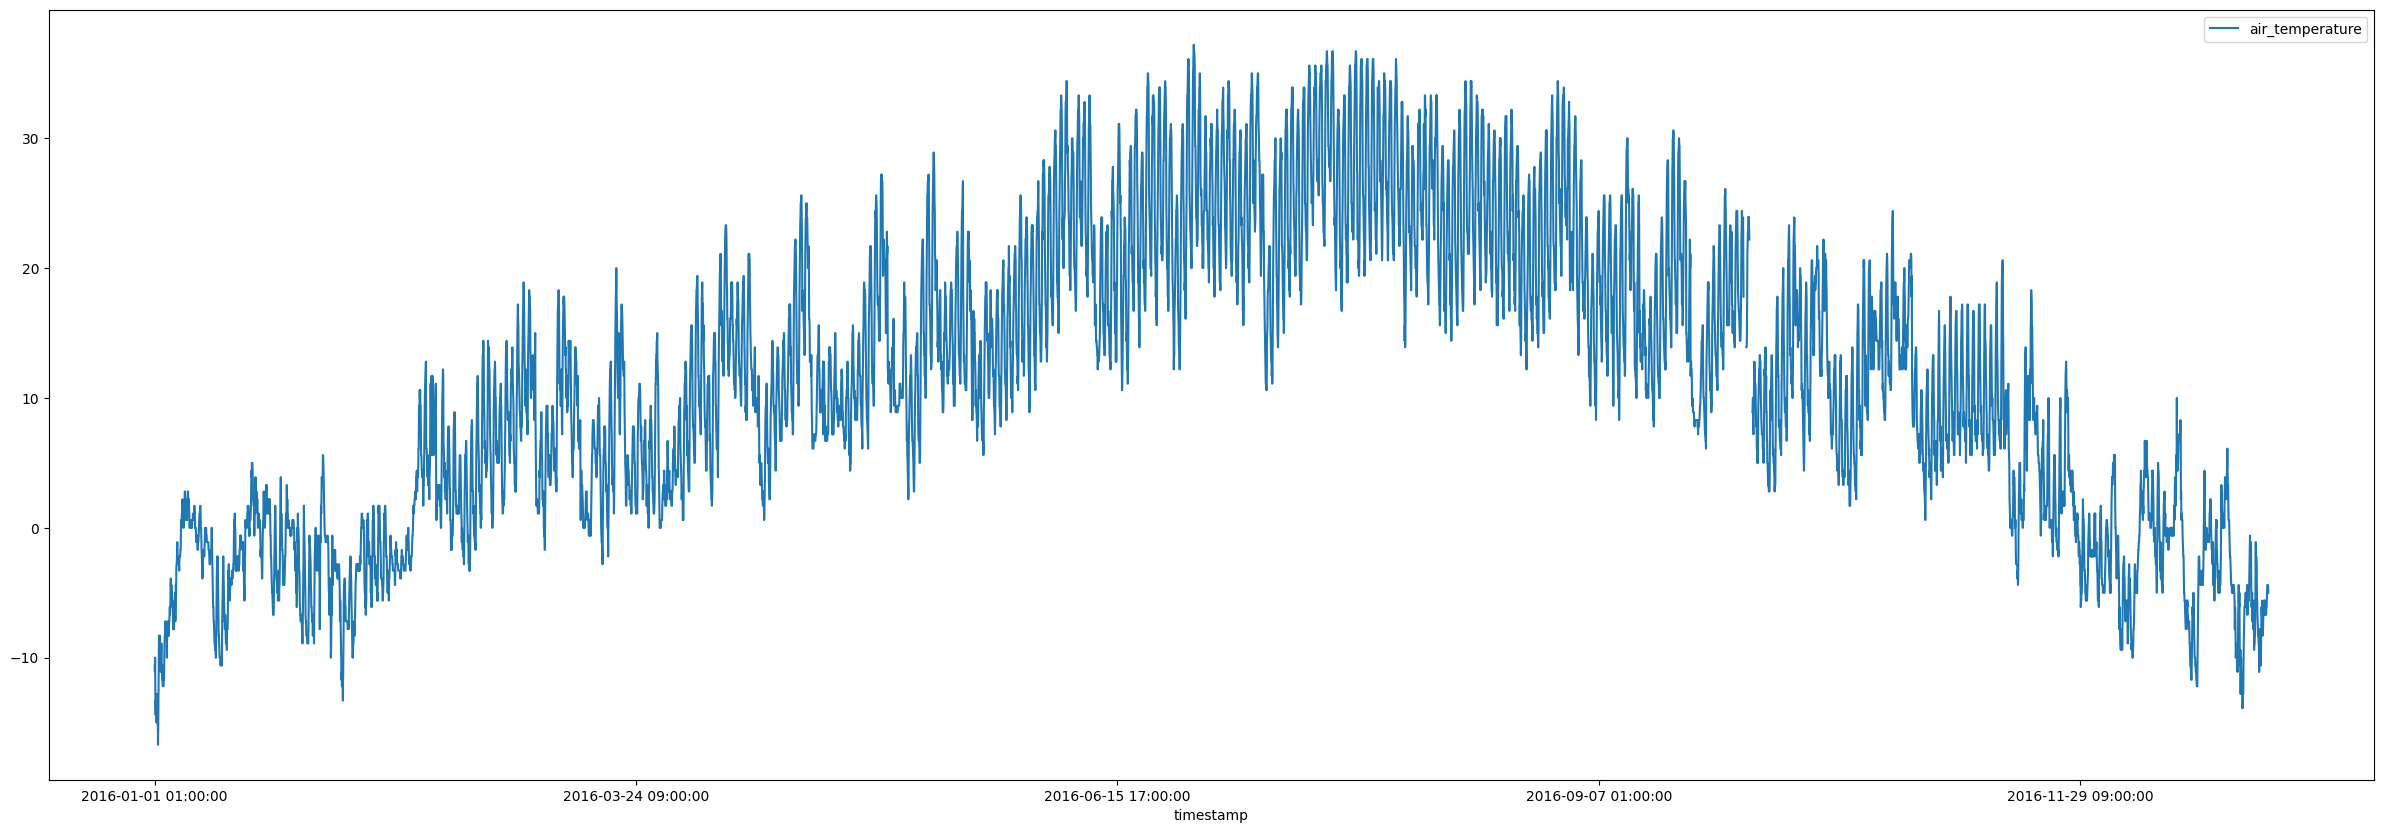

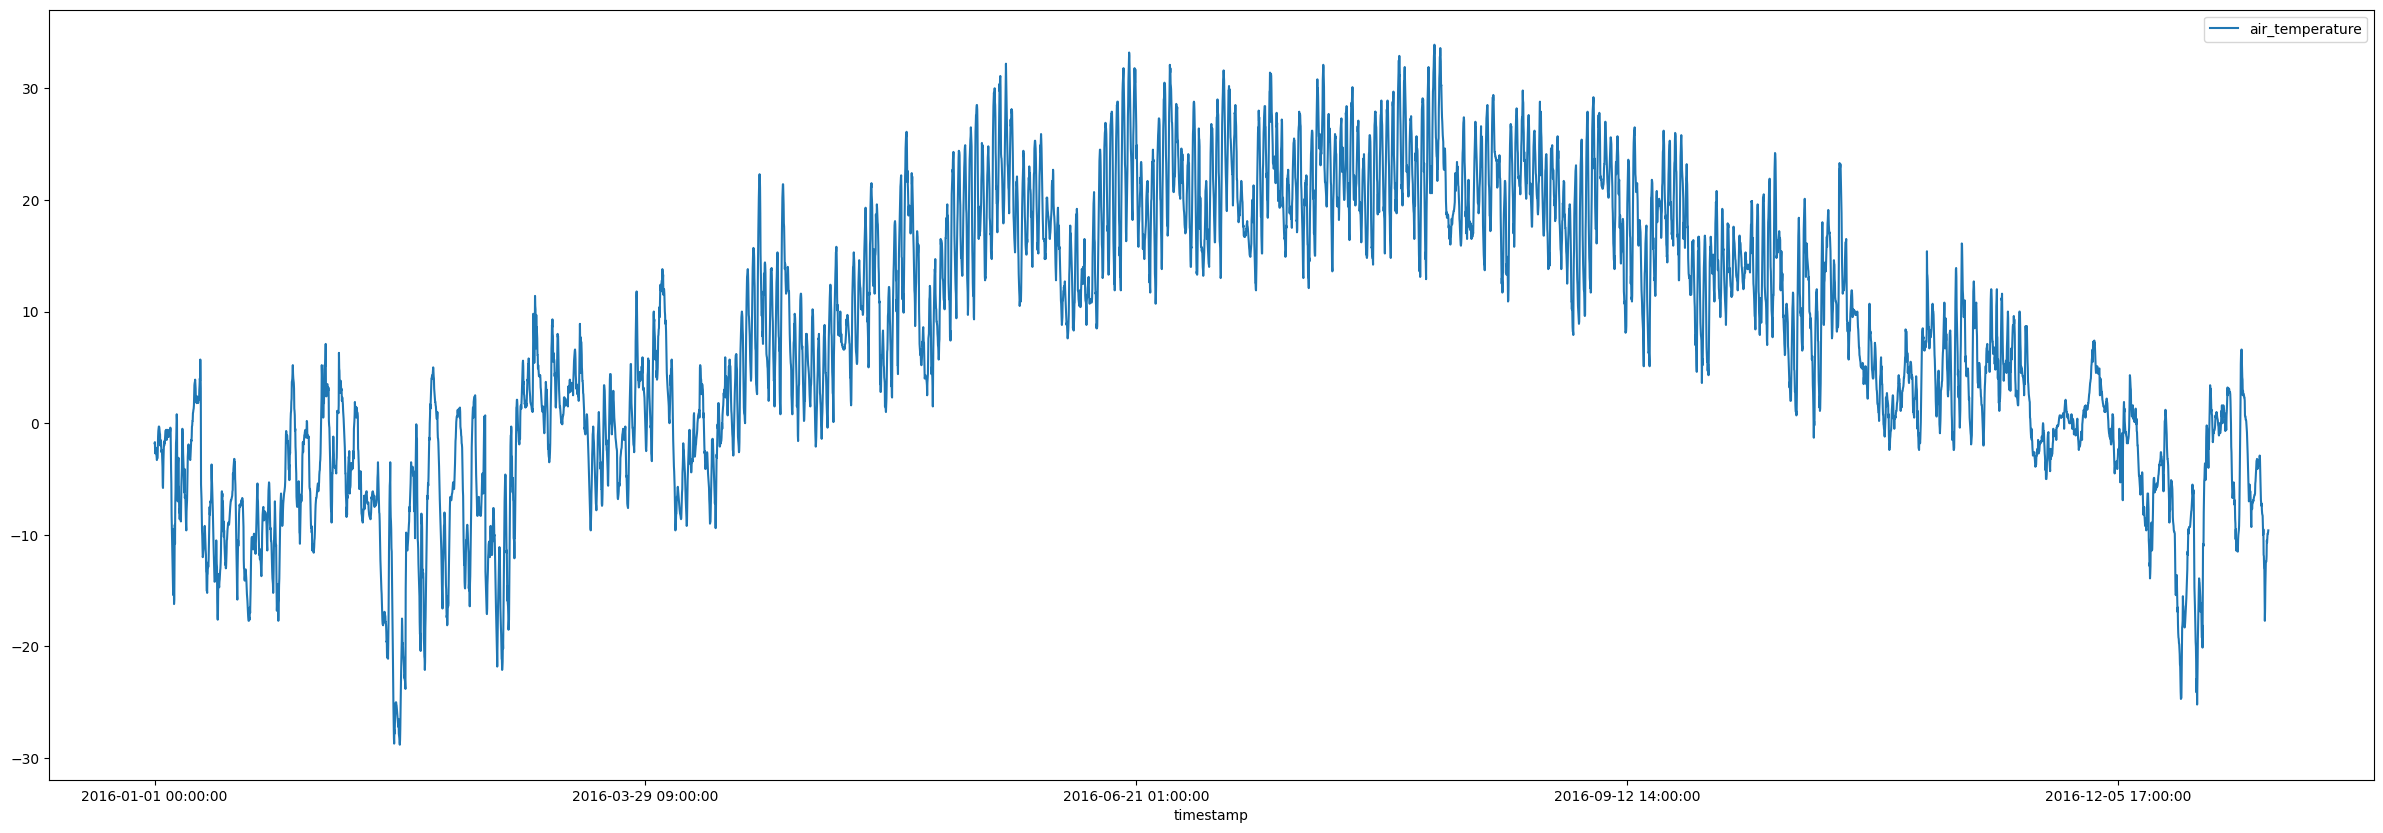

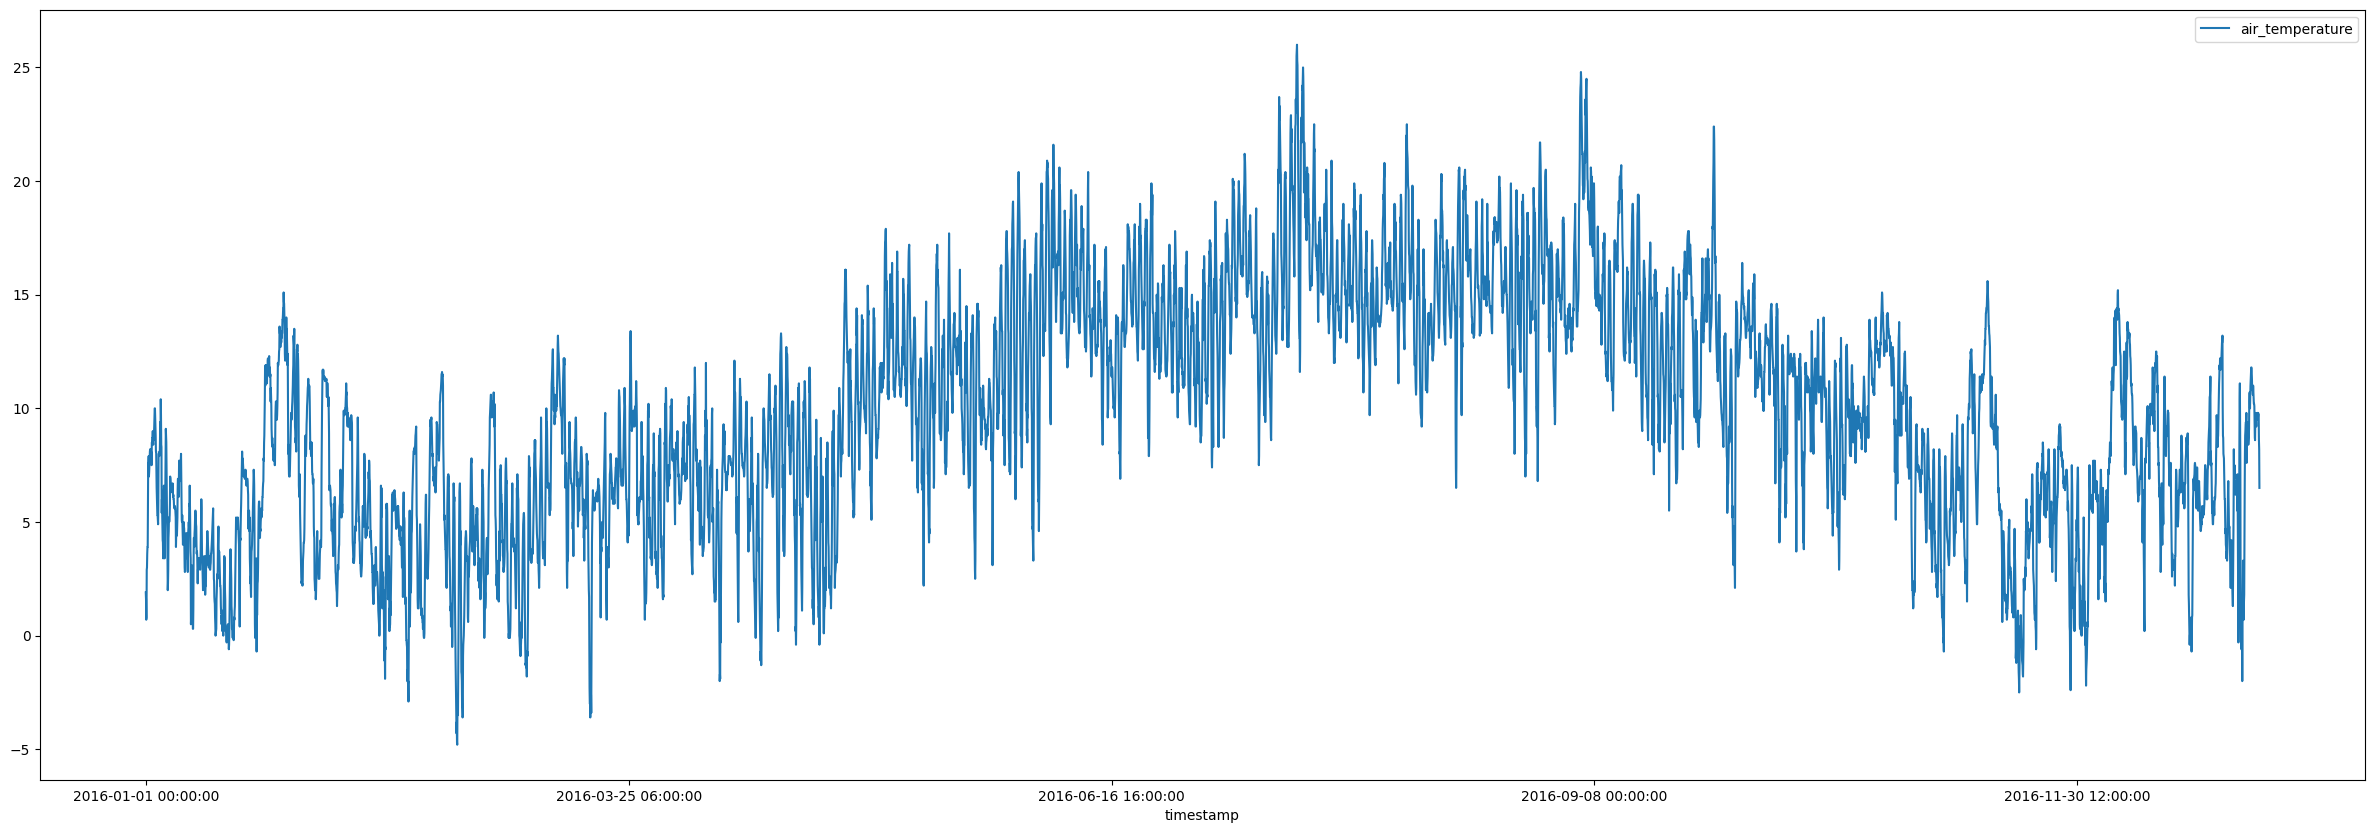

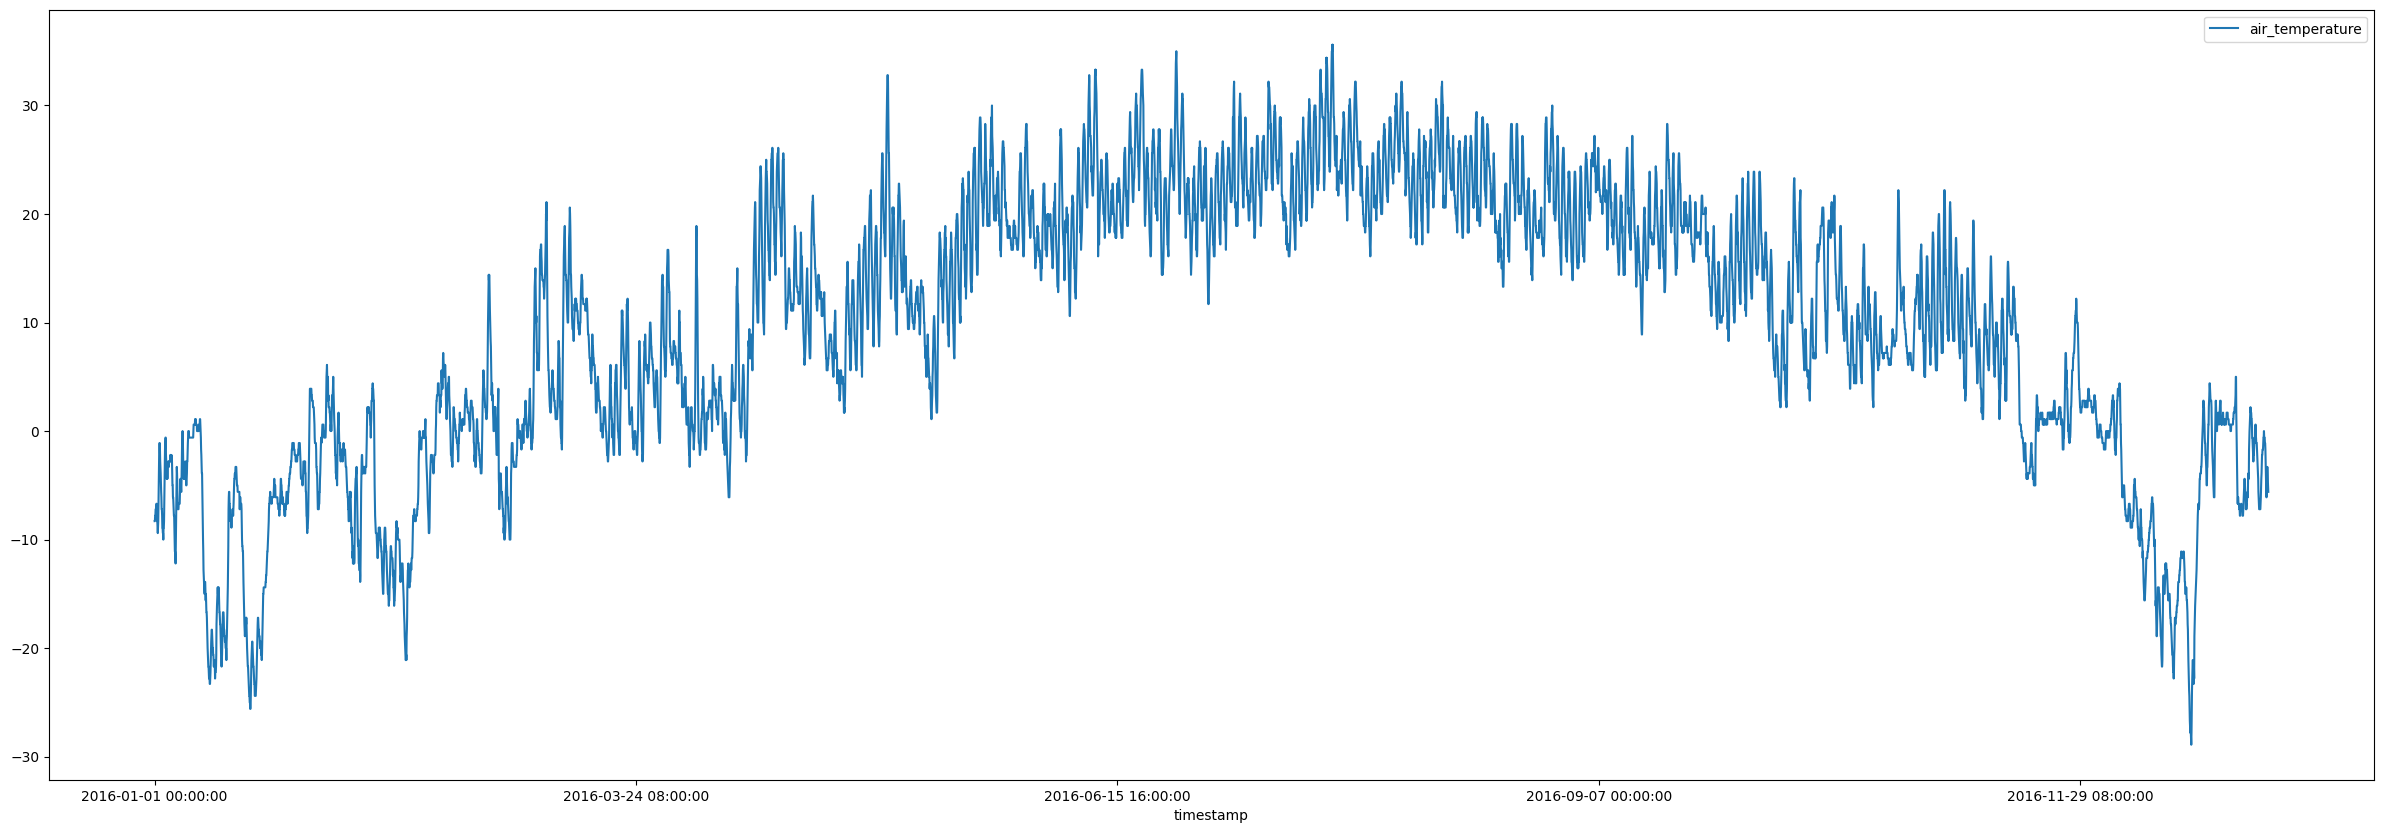

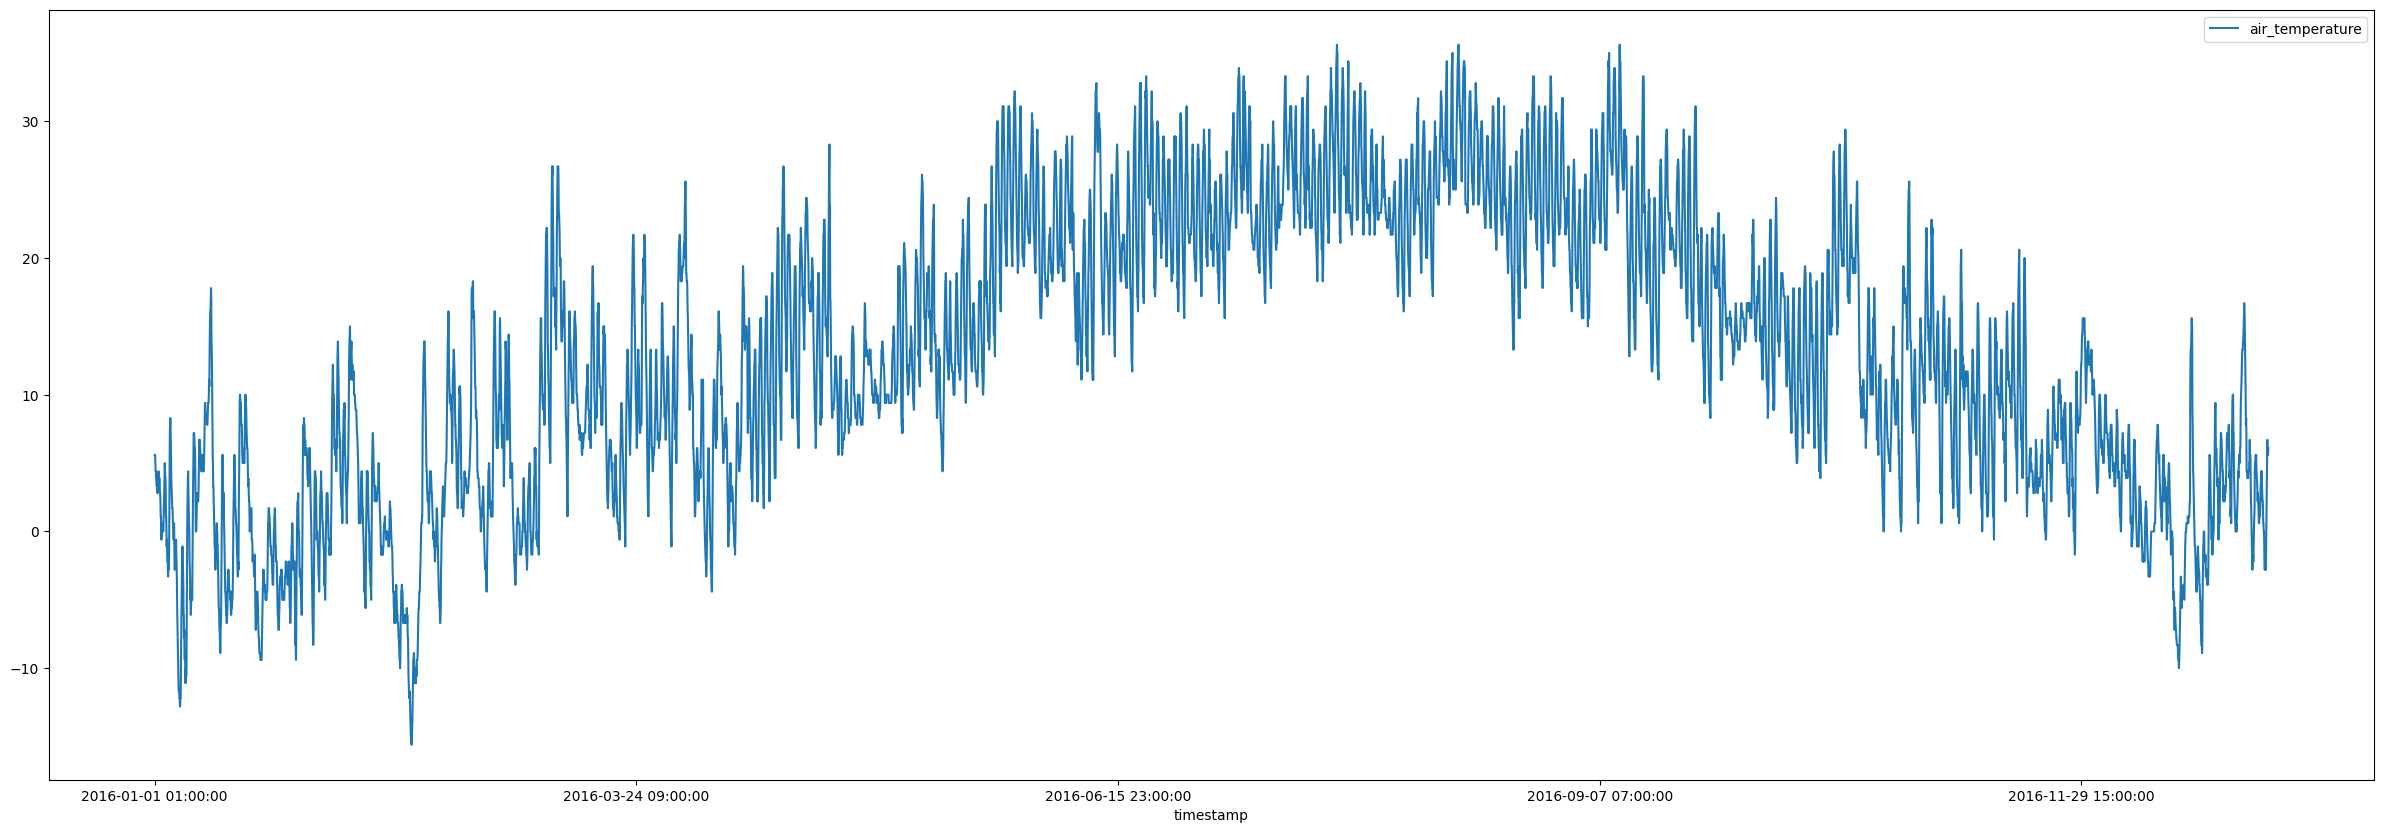

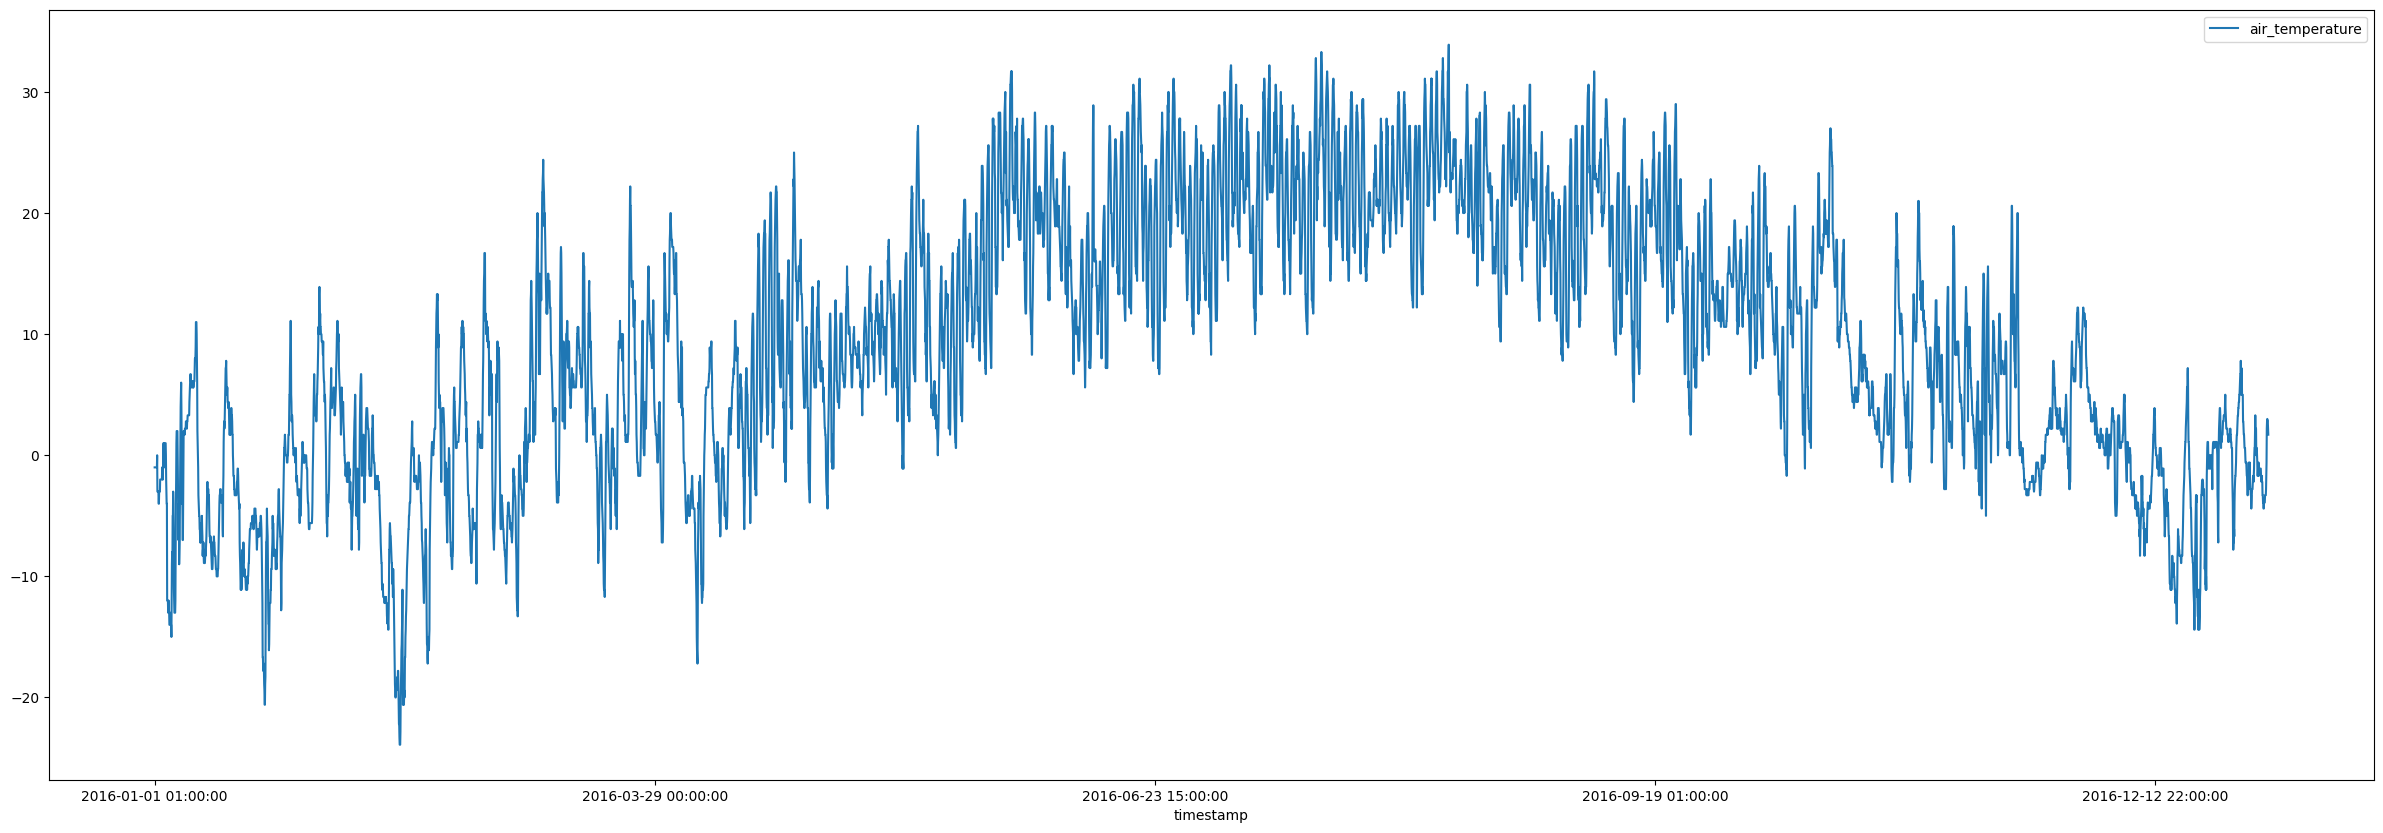

In [6]:
df_weather_train.groupby("site_id").plot(x="timestamp",y="air_temperature",subplots=True,figsize=(30,10))

In [7]:
df_building = pd.read_csv("building_metadata.csv")
df_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.1+ KB


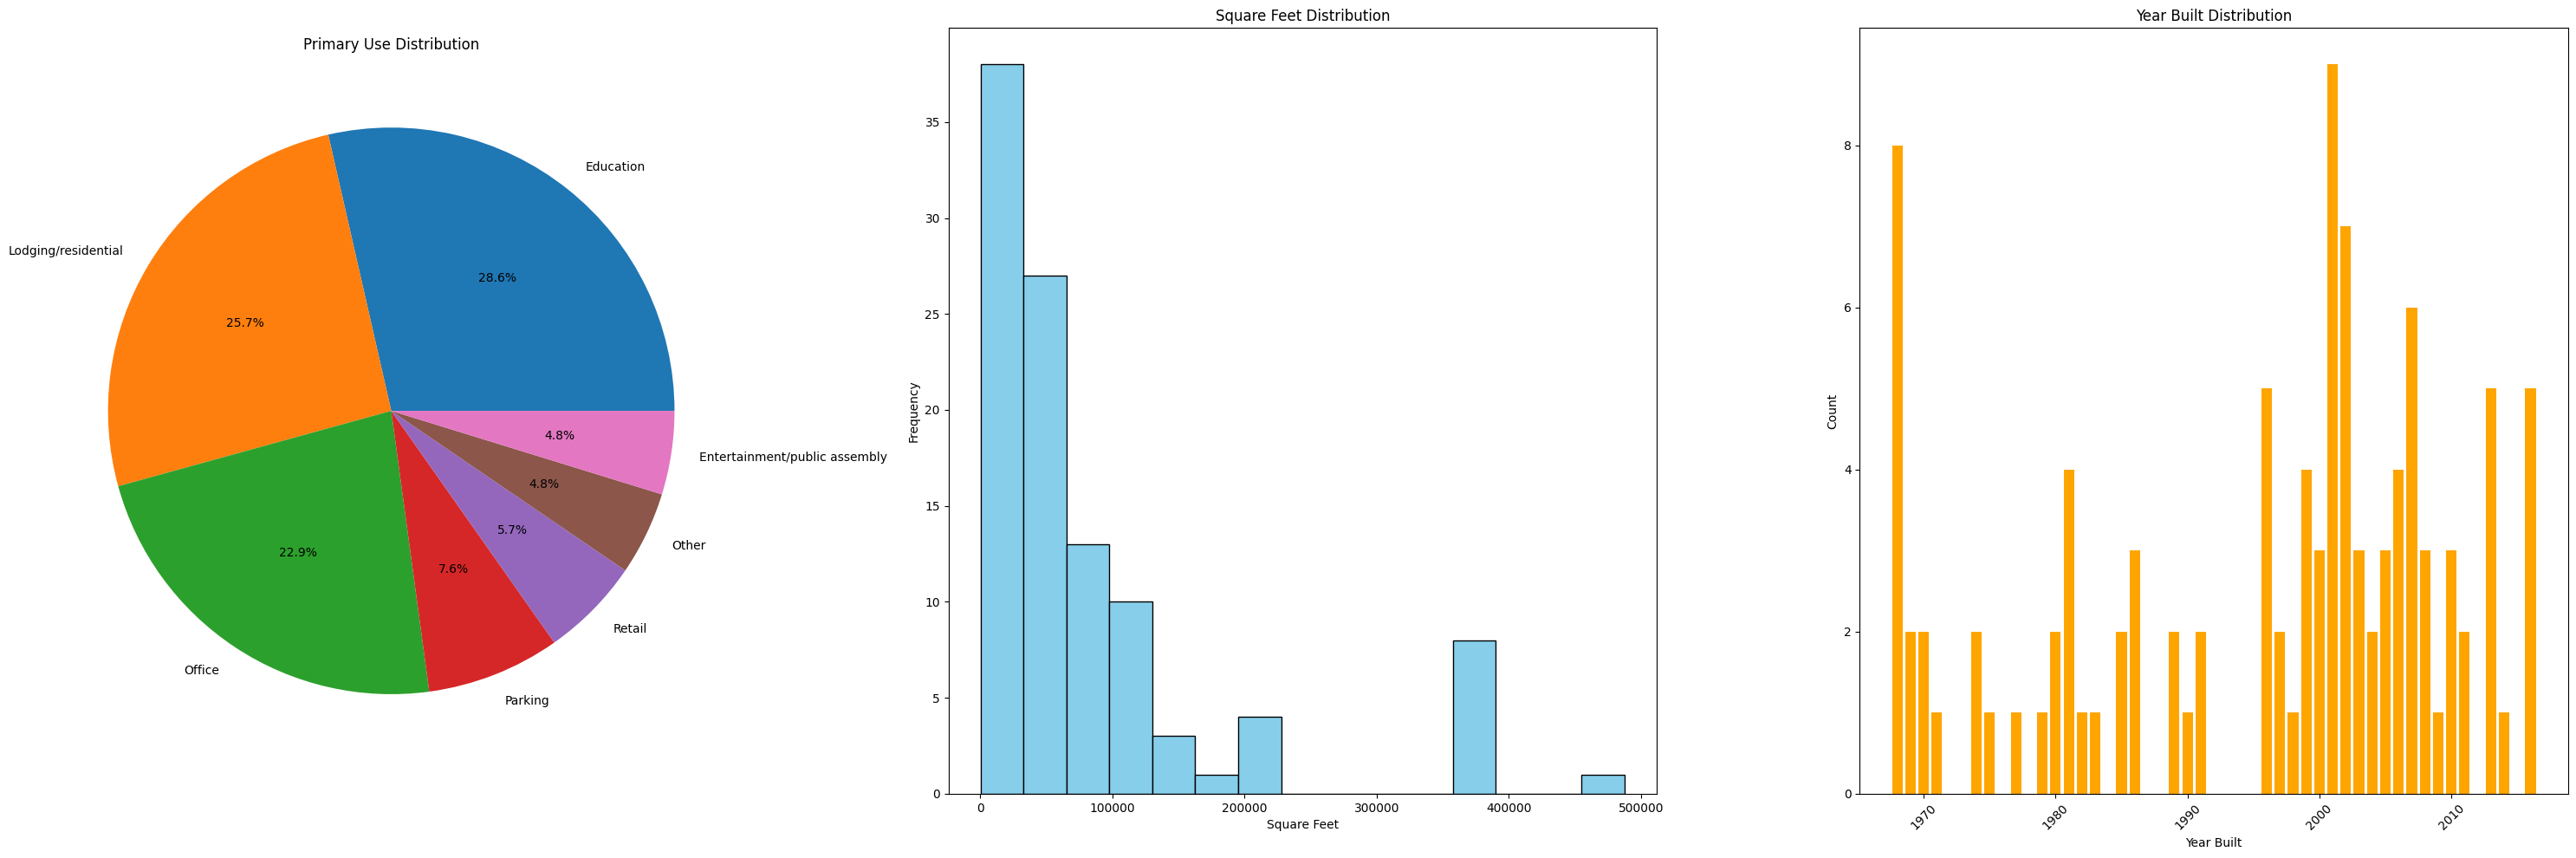

In [21]:


# Create subplots with 3 columns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Filter data for site_id == 0
fil_col_building = df_building[df_building["site_id"] == 0]

# Pie chart for primary_use distribution
counts_primary_use = fil_col_building['primary_use'].value_counts()
ax[0].pie(counts_primary_use.values, labels=counts_primary_use.keys(), autopct='%1.1f%%')
ax[0].set_title("Primary Use Distribution")

# Histogram for square_feet distribution
ax[1].hist(fil_col_building['square_feet'], bins=15, color='skyblue', edgecolor='black')
ax[1].set_title("Square Feet Distribution")
ax[1].set_xlabel("Square Feet")
ax[1].set_ylabel("Frequency")

# Bar chart for year_built distribution
count_year = fil_col_building['year_built'].value_counts().sort_index()
ax[2].bar(count_year.index, count_year.values, color='orange')
ax[2].set_title("Year Built Distribution")
ax[2].set_xlabel("Year Built")
ax[2].set_ylabel("Count")
ax[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()
